# BMR and Calories Predictor Model

#### Library Initialization

#### A. Data Process
##### 1. Data Processing
##### 2. Data Cleaning
##### 3. Data Explatory
##### 4. Data Slicing

#### B. Machine Modeling/Training
##### 1. Model Design
##### 2. Model Training
##### 3. Model Predicting

## Library and Path Initialization

In [240]:
# initialize library
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
import tensorflow as tf
import warnings

# initialize path
BMR_DATA = "BMR_Dataset.csv"
CAL_DATA = "calories.csv"

warnings.simplefilter(action='ignore', category=FutureWarning)

## A. Data Process

### 1. Data Processing

In [241]:
# load data with pandas

bmr_set = pd.read_csv(BMR_DATA)
cal_set = pd.read_csv(CAL_DATA)

bmr_set['gender'].replace(['Male', 'Female'],[1, 2], inplace=True)

X = ["age","weight","height","gender"]
Y = ["BMR"]

bmr_set_x = bmr_set[X]
bmr_set_y = bmr_set[Y]

In [242]:
bmr_set_x.head(5)

,age,weight,height,gender
0,27.0,73.066833,162.723887,1.0
1,28.0,77.730284,179.495414,2.0
2,57.0,85.704790,158.403052,1.0
3,47.0,67.012186,168.113746,1.0
4,36.0,79.929512,175.561126,1.0


In [243]:
bmr_set_y.head(5)

,BMR
0,1576.878448
1,1536.656455
2,1697.694955
3,1471.524942
4,1743.147435


In [244]:
cal_set.head(5)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [245]:
# Check wheter the bmr_set is normally distributed
bmr_set.describe()

,user_id,age,weight,height,gender,BMR
count,9000.000000,8989.000000,8993.000000,8992.000000,8990.000000,9000.000000
mean,4500.500000,40.967293,69.624393,169.908044,1.499666,1475.479479
std,2598.220545,13.588124,15.036687,9.894197,0.500028,200.373795
min,1.000000,18.000000,11.484503,133.816706,1.000000,690.711745
25%,2250.750000,29.000000,59.509476,163.323677,1.000000,1340.847648
50%,4500.500000,41.000000,69.680270,169.893600,1.000000,1475.039499
75%,6750.250000,53.000000,79.614839,176.620686,2.000000,1610.698221
max,9000.000000,64.000000,124.454472,204.366568,2.000000,2209.519518


In [246]:
# Check for missing values
print(bmr_set.isna().sum())

user_id     0
age        11
weight      7
height      8
gender     10
BMR         0
dtype: int64


### 2. Data Cleaning and Normalization

In [247]:
# impute missing datas

bmr_set_x["age"].fillna(bmr_set_x["age"].mode()[0], inplace=True)
bmr_set_x["weight"].fillna(bmr_set_x["weight"].mean(), inplace=True)
bmr_set_x["height"].fillna(bmr_set_x["height"].mean(), inplace=True)
bmr_set_x["gender"].fillna(bmr_set_x["gender"].mode()[0], inplace=True)

# normalize the dataset
for var in ["age","height","weight"] :
    bmr_set_x[var] = (bmr_set_x[var] - bmr_set_x[var].min()) / (bmr_set_x[var].max() - bmr_set_x[var].min())

bmr_set_y = (bmr_set_y - bmr_set_y.min()) / (bmr_set_y.max() - bmr_set_y.min())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10692\474309941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmr_set_x["age"].fillna(bmr_set_x["age"].mode()[0], inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10692\474309941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmr_set_x["weight"].fillna(bmr_set_x["weight"].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10692\474309941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [248]:
bmr_set_x.head(5)

,age,weight,height,gender
0,0.195652,0.545121,0.409741,1.0
1,0.217391,0.586402,0.647467,2.0
2,0.847826,0.656991,0.348496,1.0
3,0.630435,0.491526,0.486139,1.0
4,0.391304,0.605869,0.591701,1.0


In [249]:
bmr_set_y.head(5)

,BMR
0,0.583462
1,0.556979
2,0.663009
3,0.514096
4,0.692935


### 3. Data Expla(na)tory

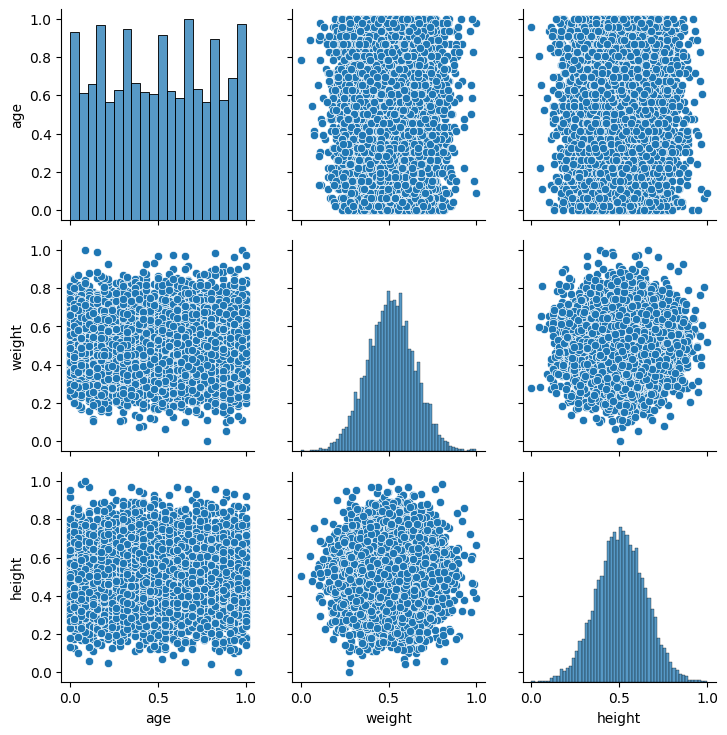

In [250]:
graph = sb.PairGrid(bmr_set_x[["age", "weight", "height"]])
graph.map_diag(sb.histplot)
graph.map_offdiag(sb.scatterplot)

### 4. Data Slicing

In [251]:
# The bmr_set will be divided into train_set and val_set with ratio of 8:2
bmr_set_x = bmr_set_x.to_numpy()
bmr_set_y = bmr_set_y.to_numpy()
bmr_set_x_tens = tf.data.Dataset.from_tensor_slices(bmr_set_x)
bmr_set_y_tens = tf.data.Dataset.from_tensor_slices(bmr_set_y)

train_set_x , val_set_x = tf.keras.utils.split_dataset(bmr_set_x, left_size = 0.8)
train_set_y , val_set_y = tf.keras.utils.split_dataset(bmr_set_y, left_size = 0.8)

In [252]:
int(train_set_x.cardinality())

7200

In [253]:
int(val_set_y.cardinality())

1800

## B. Machine Modeling/Training

### 1. Model Design

In [263]:
np.shape(bmr_set_x)
SHAPE = 4

In [264]:
np.shape(bmr_set_y)

(9000, 1)

In [273]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,4)),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu"),
])

model.compile(
    optimizer = "adam",
    loss = "mean_absolute_error",
    metrics = ["accuracy"]
)

# Train the model
history = model.fit(train_set_x, train_set_y,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_set_x, val_set_y),
                    verbose=1)

ValueError: When providing `x` as a tf.data.Dataset, `y` should not be passed. Instead, the targets should be included as part of the tf.data.Dataset.